In [1]:
%load_ext autoreload
%matplotlib inline

In [2]:
###### %autoreload 2

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import sys,os,glob
import pprint
import re
import xarray as xr

## Add own library to path
workdir = os.getcwd()
thismodule = sys.modules[__name__]
moduledir = os.path.join(os.path.dirname(workdir),'functions')
sys.path.insert(0,moduledir)
print("Own modules available:", [os.path.splitext(os.path.basename(x))[0]
                                 for x in glob.glob(os.path.join(moduledir,'*.py'))])

## Load own libraries
from thermoConstants import *
from setEnv import *

## Graphical parameters
plt.style.use(os.path.join(matplotlib.get_configdir(),'stylelib/presentation.mplstyle'))

Own modules available: ['thermoConstants', 'setEnv', 'thermoFunctions', 'importingData', 'statisticalDistributions', 'plot1DInvLog', 'dataFormat', 'savingResults', 'thermoConstantsForMoistAdiabat', 'scalingApproximations', 'slicingAndSubsetting', 'thermoFunctionsForMoistAdiabat', 'plot2D']


In [16]:
case = 'RCE'
simroot = "RCE_MPDATAxTKExCAMxSAM1MOM_4000x4000x15_256x256x64"
sst_ref = 302
# state = 'organized'
state = 'disorganized'
state_label = {'organized':'','disorganized':'-radhomo'}
expname = "TKE-SST%d%s-r1"%(sst_ref,state_label[state])
print("experiment:",expname)
simname = "%s_%s"%(simroot,expname)
archivedir = getArchivedir(machine='coriknl')

experiment: TKE-SST302-radhomo-r1


In [17]:
simdir = os.path.join(archivedir,simname,'OUT_STAT')
filename = "%s.nc"%simname
ds = xr.open_dataset(os.path.join(simdir,filename))

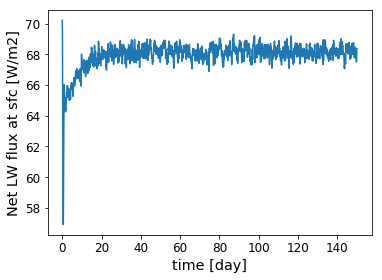

In [18]:
ds.LWNS.plot()

In [19]:
header = 'p[mb] (dt/dt)rad[K/s]\n'
metadata1 = '0    63   day,levels\n'
metadata2 = '1000    63   day,levels\n'
rad_varname = header.split(' ')

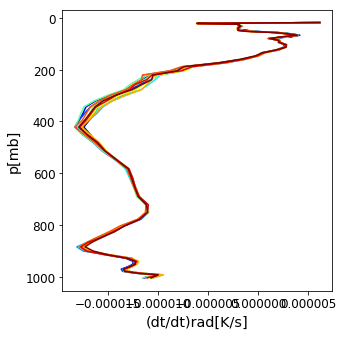

In [20]:
ndays = 60
K = 24*ndays
dK = 24*5
N = int(K/dK)
Ts = np.arange(ds.dims['time']-K,ds.dims['time'],dK)

colorInd = range(len(Ts))
cm = plt.get_cmap('jet') 
cNorm = colors.Normalize(vmin=0, vmax=colorInd[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)

fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(5,5))

for i in range(len(Ts)):
    colorVal = scalarMap.to_rgba(colorInd[i])
    ax.plot(ds.RADQR.data[Ts[i]]/86400.,ds.p,c=colorVal)
ax.invert_yaxis()
ax.set_xlabel(rad_varname[1])
ax.set_ylabel(rad_varname[0])
plt.show()

In [21]:
p = np.convolve(ds.p.data,(0.5,0.5),'valid')
radqr = np.convolve(ds.RADQR.data[-K:].mean(axis=0),(0.5,0.5),'valid')/86400.

various profiles 


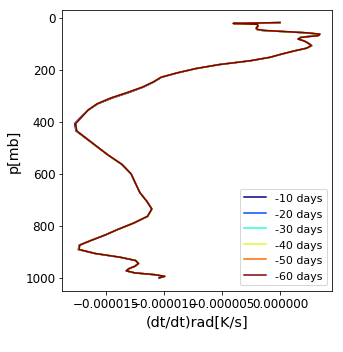

In [22]:
print("various profiles ")

days_before_end = (10,20,30,40,50,60)

colorInd = range(len(days_before_end))
cm = plt.get_cmap('jet') 
cNorm = colors.Normalize(vmin=0, vmax=colorInd[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)

fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(5,5))
for i in range(len(days_before_end)):
    nd = days_before_end[i]
    Ki = 24*nd
    colorVal = scalarMap.to_rgba(colorInd[i])
    rq = np.convolve(ds.RADQR.data[-Ki:].mean(axis=0),(0.5,0.5),'valid')/86400.
    ax.plot(rq,p,c=colorVal,label="-%d days"%nd)
ax.invert_yaxis()
ax.set_xlabel(rad_varname[1])
ax.set_ylabel(rad_varname[0])
ax.legend(fontsize=11)
plt.show()

# Create radiation file

In [23]:
modeldir = getModelDir()
rad_file = os.path.join(modeldir,case,'rad_from_%s'%expname)

In [24]:
f = open(rad_file,'w')
f.write(header)
f.write(metadata1)

21

In [25]:
for i in range(len(p)):
    f.write('  '.join(["%.3f"%p[i],"%.6E\n"%radqr[i]]))

In [26]:
f.write(metadata2)

24

In [27]:
for i in range(len(p)):
    f.write('  '.join(["%.3f"%p[i],"%.6E\n"%radqr[i]]))

In [28]:
f.close()